In [17]:
# Step 1: Install dependencies
!pip install nltk scikit-learn streamlit --quiet

In [20]:
# step :2 import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report


In [21]:
# Download NLTK stopwards
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
#step 3 : Load Dataset (IMDB / custom CSV)
df = pd.read_csv("/content/IMDB Dataset.csv") # upload file in colab
print (df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [25]:
# step 4 : Data Preprocessing
import re

stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(preprocess_text)

In [26]:
# Step 5: Feature Extraction (TF-IDF)
X = df['clean_review']
y = df['sentiment'].map({'positive':1, 'negative':0})

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [27]:
# Step 6: Model Training
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [28]:
# Step 7: Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8873

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



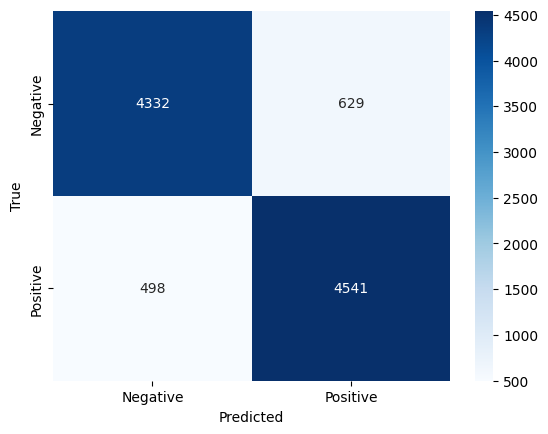

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [30]:
# Step 8: Predict New Review
sample_review = "The movie was fantastic, I loved it!"
sample_clean = preprocess_text(sample_review)
sample_vec = tfidf.transform([sample_clean])
prediction = model.predict(sample_vec)
print("Prediction:", "Positive" if prediction[0]==1 else "Negative")

Prediction: Positive
